In [181]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

import scipy.stats as stats
import os

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [182]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [183]:
#look at features
customer_df.info()
customer_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

(9134, 24)

In [184]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [185]:
customer_df.columns = [col.lower().replace(" ","_") for col in customer_df.columns]
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [186]:
customer_df.drop('customer', axis = 1, inplace = True)


In [187]:
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


<AxesSubplot: xlabel='total_claim_amount', ylabel='Density'>

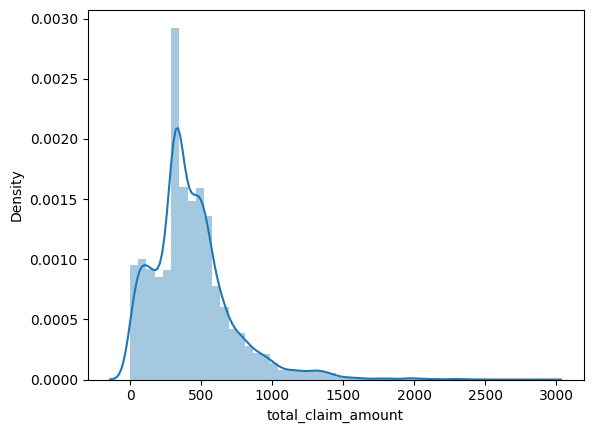

In [188]:
sns.distplot(customer_df['total_claim_amount'])

In [189]:
numerical_df = customer_df.select_dtypes('number')
categorical_df = customer_df.select_dtypes('object')

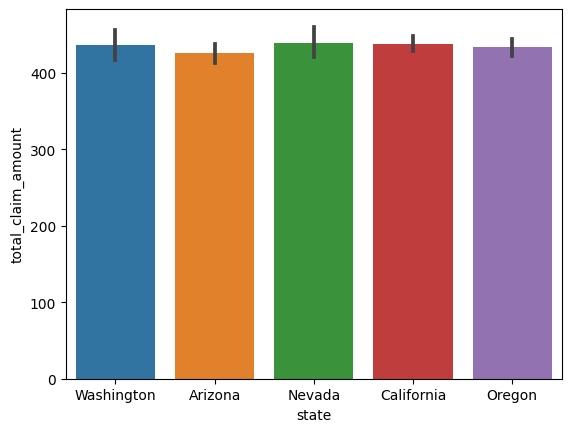

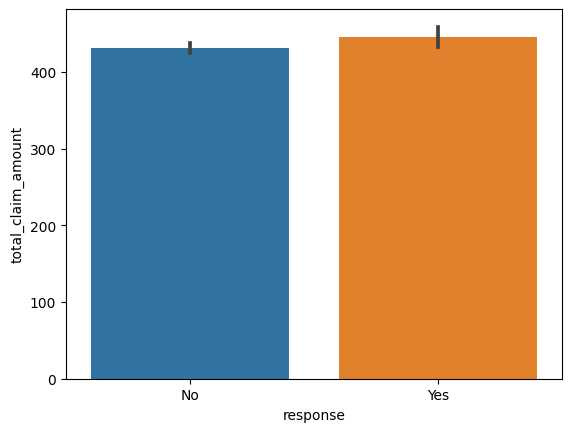

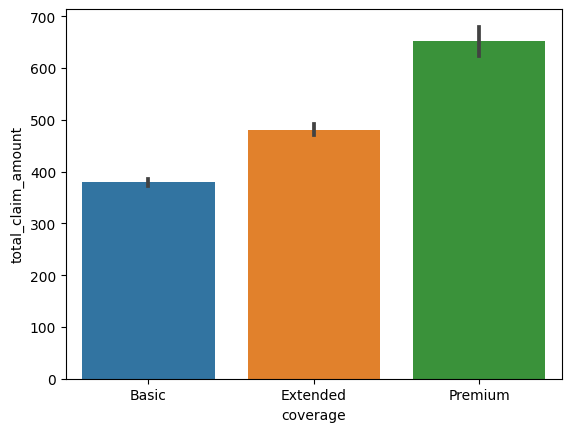

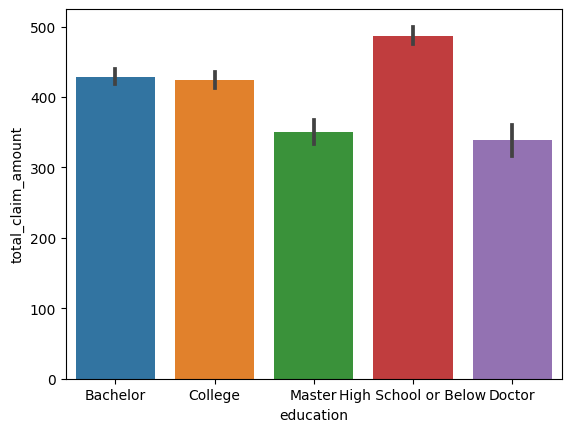

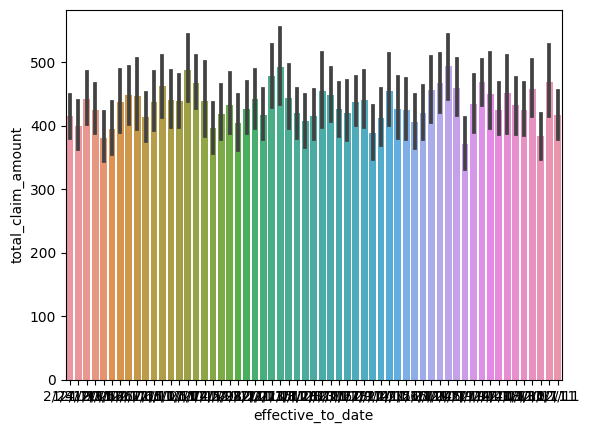

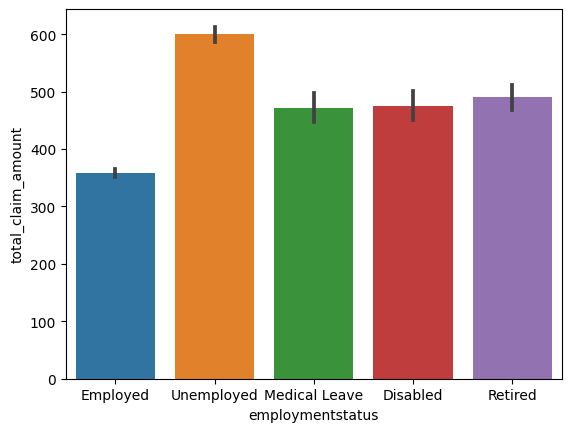

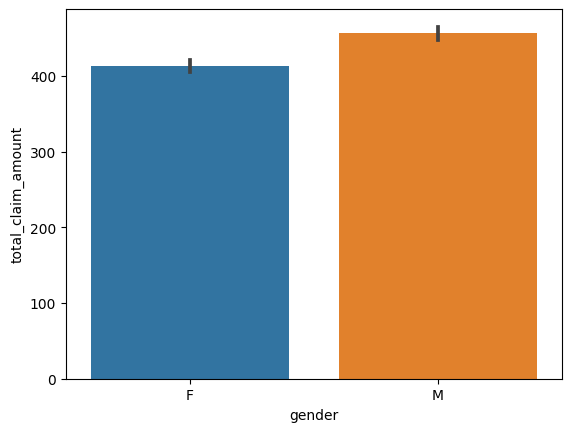

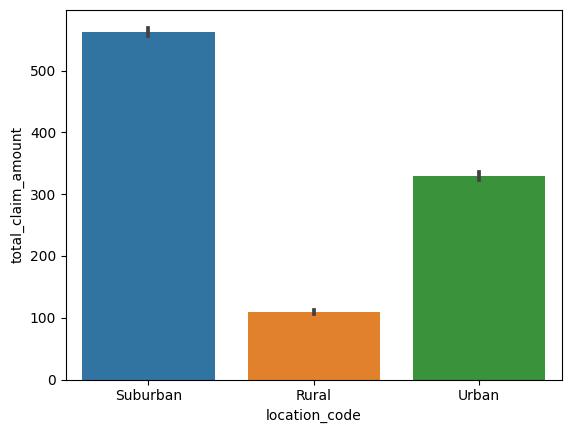

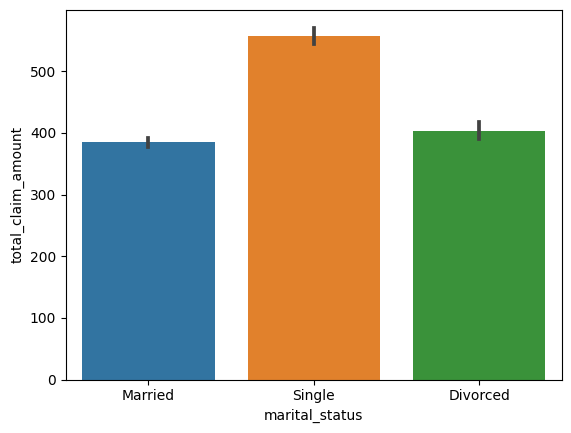

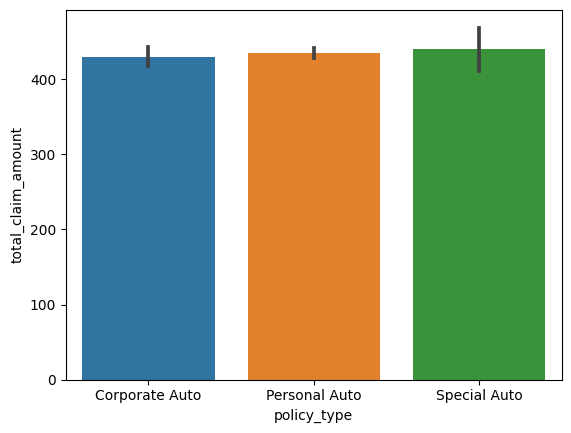

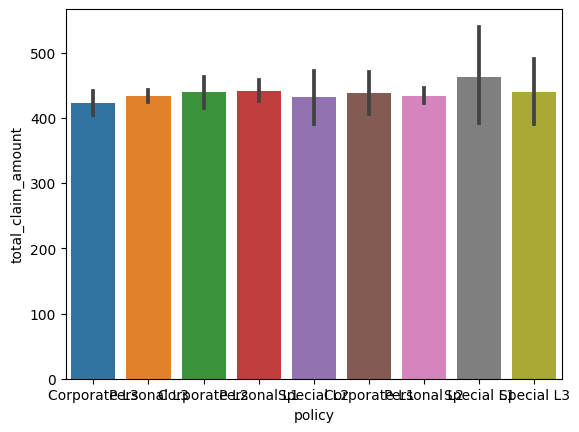

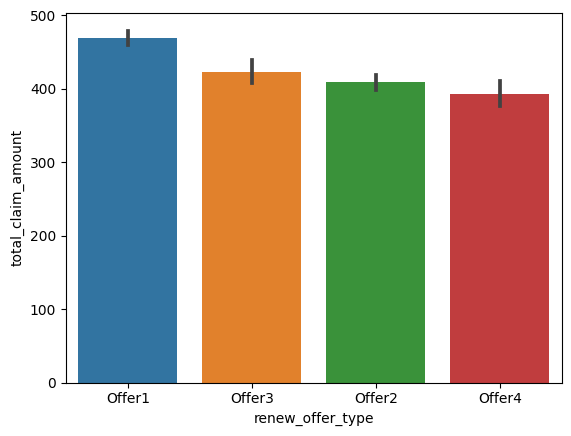

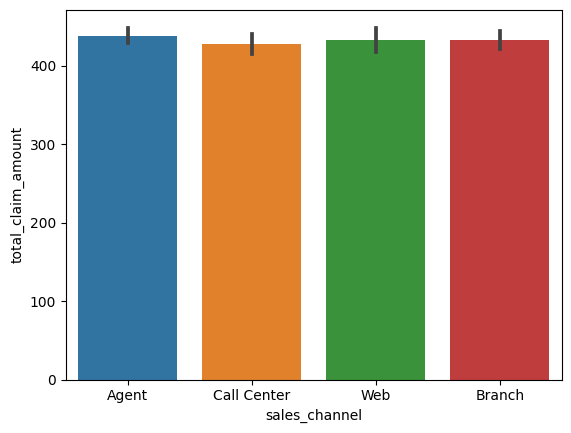

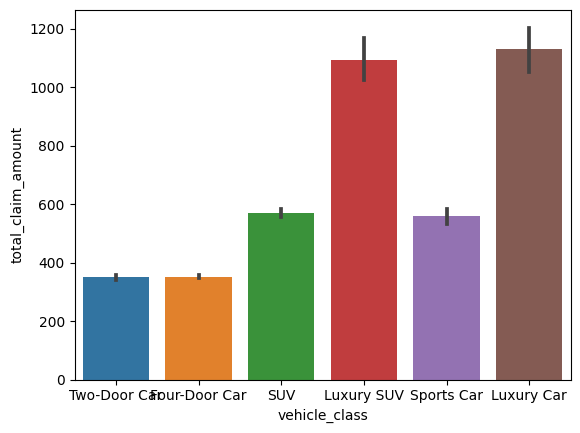

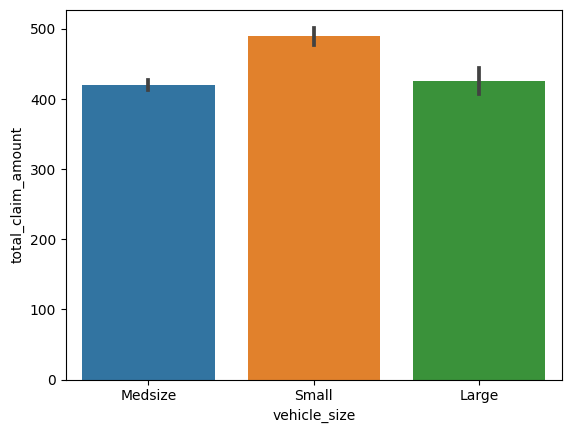

In [190]:
#plotting each unique category in the column on the x-axis and the target n the Y-axis
for i in customer_df.select_dtypes('object').columns:
    sns.barplot(x=customer_df[i], y="total_claim_amount", data=customer_df)
    plt.show()

In [191]:
for column in categorical_df.columns:
    print(categorical_df[column].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     149
1

In [192]:
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [193]:
#Q1 remove outliers
def remove_outliers(customer_df, threshold= 1.5, in_columns=['total_claim_amount']):
    for column in in_columns:
            upper = np.percentile(customer_df[column],75)
            lower = np.percentile(customer_df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            customer_df = customer_df[(customer_df[column]>lower_limit) & (customer_df[column]<upper_limit)]
    return customer_df

In [194]:
#Q2 create a copy of dataframe
customer_df2 = remove_outliers(customer_df, threshold= 1.5) 
customer_df2


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [195]:
# apply log transformation 
# def log_transform(x):
#     if np.isfinite(x) and x!=0:
#         return np.log(x)
#     else:
#         return np.NAN

# or
#log_transform = lambda x: np.log(x) if np.isfinite(x) and x != 0 else np.NAN

In [196]:
# customer_df3 = customer_df2.copy()

# customer_df3['total_claim_amount'] = customer_df3['total_claim_amount'].apply(log_transform).fillna(customer_df3['total_claim_amount'].mean())

In [197]:
# sns.distplot(customer_df3['total_claim_amount'])

In [198]:
#Normalize using boxcox
def boxcox_transform(customer_df2):
    numeric_cols = customer_df2.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        customer_df2[column] = np.where(customer_df2[column]<=0, np.NAN, customer_df2[column]) 
        customer_df2[column] = customer_df2[column].fillna(customer_df2[column].mean())
        transformed_data, ci = stats.boxcox(customer_df2[column])
        customer_df2[column] = transformed_data
        _ci[column] = [ci] 
    return customer_df2, _ci

In [199]:
customer_df2, _ci = boxcox_transform(customer_df2)
customer_df2

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2.642969,No,Basic,Bachelor,2/24/11,Employed,F,1270.977799,Suburban,...,3.017449,0.654103,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,94.530090,Two-Door Car,Medsize
2,Nevada,2.713673,No,Premium,Bachelor,2/19/11,Employed,F,1164.860540,Suburban,...,17.382486,0.654103,0.607152,Personal Auto,Personal L3,Offer1,Agent,124.784151,Two-Door Car,Medsize
3,California,2.693888,No,Basic,Bachelor,1/20/11,Unemployed,M,1193.464490,Suburban,...,26.148886,0.654103,1.362446,Corporate Auto,Corporate L2,Offer1,Call Center,118.950054,SUV,Medsize
4,Washington,2.644038,No,Basic,Bachelor,2/3/11,Employed,M,1091.643083,Rural,...,19.453787,0.654103,0.000000,Personal Auto,Personal L1,Offer1,Agent,44.997459,Four-Door Car,Medsize
5,Oregon,2.697035,Yes,Basic,Bachelor,1/25/11,Employed,F,1360.130527,Rural,...,34.444603,0.654103,0.607152,Personal Auto,Personal L3,Offer2,Web,49.952314,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,2.732213,No,Basic,Bachelor,2/10/11,Employed,M,1475.983390,Urban,...,33.073543,0.654103,0.607152,Personal Auto,Personal L1,Offer2,Web,58.541566,Four-Door Car,Medsize
9130,California,2.649618,Yes,Extended,College,2/12/11,Employed,F,709.350146,Suburban,...,13.704808,0.654103,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,93.536311,Four-Door Car,Medsize
9131,California,2.696579,No,Extended,Bachelor,2/6/11,Unemployed,M,1193.464490,Suburban,...,17.028444,1.183744,0.607152,Corporate Auto,Corporate L2,Offer1,Branch,158.449389,Four-Door Car,Medsize
9132,California,2.693222,No,Extended,College,2/3/11,Employed,M,716.074016,Suburban,...,1.667714,0.654103,0.893087,Personal Auto,Personal L2,Offer3,Branch,143.902241,Four-Door Car,Large


<AxesSubplot: xlabel='total_claim_amount', ylabel='Density'>

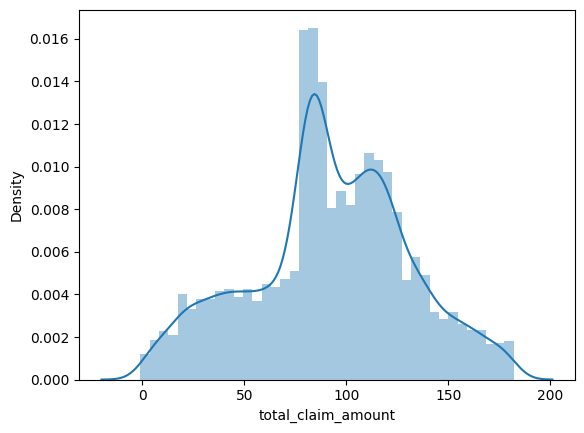

In [200]:
#distribution curve shape changed using box cox and looks more normal now
sns.distplot(customer_df2['total_claim_amount'])

In [201]:
for col in customer_df2:
    print(customer_df2[col].value_counts(), '\n')

California    2978
Oregon        2474
Arizona       1629
Nevada         836
Washington     764
Name: state, dtype: int64 

2.711674    6
2.638678    6
2.641010    6
2.668105    6
2.699198    6
           ..
2.688184    1
2.696059    1
2.701322    1
2.642627    1
2.639568    1
Name: customer_lifetime_value, Length: 7639, dtype: int64 

No     7433
Yes    1248
Name: response, dtype: int64 

Basic       5442
Extended    2556
Premium      683
Name: coverage, dtype: int64 

Bachelor                2614
College                 2557
High School or Below    2452
Master                   719
Doctor                   339
Name: education, dtype: int64 

1/27/11    187
1/10/11    183
2/14/11    179
1/31/11    173
1/17/11    171
1/19/11    170
1/3/11     169
1/20/11    168
1/26/11    165
2/19/11    163
2/26/11    163
1/28/11    163
2/27/11    160
1/11/11    158
1/21/11    155
2/3/11     154
2/28/11    154
1/2/11     153
2/5/11     153
1/29/11    151
2/7/11     151
2/12/11    150
2/4/11     150
1/23

In [202]:
#Encode categorical variables
customer_df2["coverage"] = customer_df2["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [203]:
customer_df2["employmentstatus"] = customer_df2["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})

In [204]:
customer_df2["location_code"] = customer_df2["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [205]:
customer_df2["vehicle_size"] = customer_df2["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})

In [206]:
customer_df2

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2.642969,No,0,Bachelor,2/24/11,0,F,1270.977799,0,...,3.017449,0.654103,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,94.530090,Two-Door Car,0
2,Nevada,2.713673,No,2,Bachelor,2/19/11,0,F,1164.860540,0,...,17.382486,0.654103,0.607152,Personal Auto,Personal L3,Offer1,Agent,124.784151,Two-Door Car,0
3,California,2.693888,No,0,Bachelor,1/20/11,1,M,1193.464490,0,...,26.148886,0.654103,1.362446,Corporate Auto,Corporate L2,Offer1,Call Center,118.950054,SUV,0
4,Washington,2.644038,No,0,Bachelor,2/3/11,0,M,1091.643083,1,...,19.453787,0.654103,0.000000,Personal Auto,Personal L1,Offer1,Agent,44.997459,Four-Door Car,0
5,Oregon,2.697035,Yes,0,Bachelor,1/25/11,0,F,1360.130527,1,...,34.444603,0.654103,0.607152,Personal Auto,Personal L3,Offer2,Web,49.952314,Two-Door Car,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,2.732213,No,0,Bachelor,2/10/11,0,M,1475.983390,2,...,33.073543,0.654103,0.607152,Personal Auto,Personal L1,Offer2,Web,58.541566,Four-Door Car,0
9130,California,2.649618,Yes,1,College,2/12/11,0,F,709.350146,0,...,13.704808,0.654103,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,93.536311,Four-Door Car,0
9131,California,2.696579,No,1,Bachelor,2/6/11,1,M,1193.464490,0,...,17.028444,1.183744,0.607152,Corporate Auto,Corporate L2,Offer1,Branch,158.449389,Four-Door Car,0
9132,California,2.693222,No,1,College,2/3/11,0,M,716.074016,0,...,1.667714,0.654103,0.893087,Personal Auto,Personal L2,Offer3,Branch,143.902241,Four-Door Car,2


In [207]:
#Q5 time variable: converting effective_to_date to year, month, week & day
customer_df2['year'] = pd.DatetimeIndex(customer_df2['effective_to_date']).year

In [208]:
customer_df2['month'] = pd.DatetimeIndex(customer_df2['effective_to_date']).month

In [209]:
customer_df2['week'] = pd.DatetimeIndex(customer_df2['effective_to_date']).week

In [210]:
customer_df2['day'] = pd.DatetimeIndex(customer_df2['effective_to_date']).day

In [211]:
customer_df2

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,week,day
0,Washington,2.642969,No,0,Bachelor,2/24/11,0,F,1270.977799,0,...,Corporate L3,Offer1,Agent,94.530090,Two-Door Car,0,2011,2,8,24
2,Nevada,2.713673,No,2,Bachelor,2/19/11,0,F,1164.860540,0,...,Personal L3,Offer1,Agent,124.784151,Two-Door Car,0,2011,2,7,19
3,California,2.693888,No,0,Bachelor,1/20/11,1,M,1193.464490,0,...,Corporate L2,Offer1,Call Center,118.950054,SUV,0,2011,1,3,20
4,Washington,2.644038,No,0,Bachelor,2/3/11,0,M,1091.643083,1,...,Personal L1,Offer1,Agent,44.997459,Four-Door Car,0,2011,2,5,3
5,Oregon,2.697035,Yes,0,Bachelor,1/25/11,0,F,1360.130527,1,...,Personal L3,Offer2,Web,49.952314,Two-Door Car,0,2011,1,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,2.732213,No,0,Bachelor,2/10/11,0,M,1475.983390,2,...,Personal L1,Offer2,Web,58.541566,Four-Door Car,0,2011,2,6,10
9130,California,2.649618,Yes,1,College,2/12/11,0,F,709.350146,0,...,Corporate L3,Offer1,Branch,93.536311,Four-Door Car,0,2011,2,6,12
9131,California,2.696579,No,1,Bachelor,2/6/11,1,M,1193.464490,0,...,Corporate L2,Offer1,Branch,158.449389,Four-Door Car,0,2011,2,5,6
9132,California,2.693222,No,1,College,2/3/11,0,M,716.074016,0,...,Personal L2,Offer3,Branch,143.902241,Four-Door Car,2,2011,2,5,3


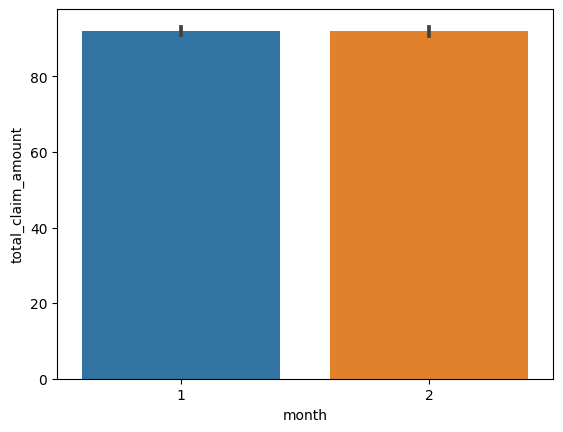

In [212]:
sns.barplot(y="total_claim_amount", x="month", data=customer_df2)
plt.show()

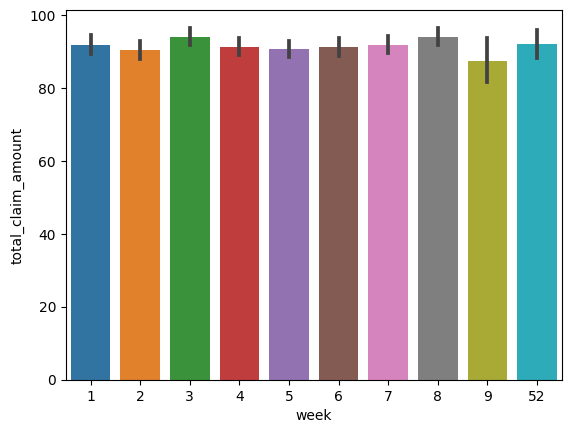

In [213]:
# not much variance across weeks, after 9th week next claimed amount is on 52nd week
sns.barplot(y="total_claim_amount", x="week", data=customer_df2)
plt.show()

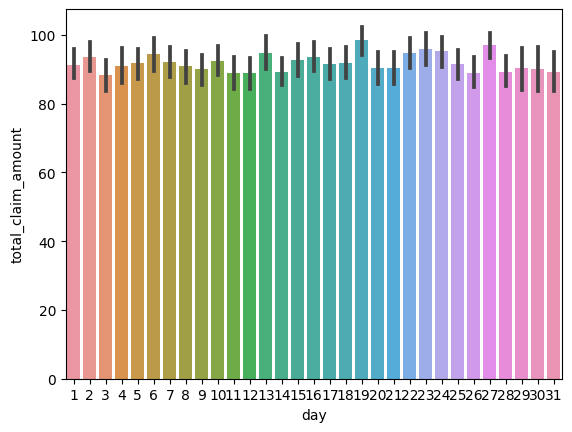

In [214]:
sns.barplot(y="total_claim_amount", x="day", data=customer_df2)
plt.show()

In [215]:
#Q4 dummifying rest of categoricals
customer_df3 = pd.get_dummies(customer_df2, drop_first=True) # i'm lazy
customer_df3

,customer_lifetime_value,coverage,employmentstatus,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,2.642969,0,0,1270.977799,0,0.688710,10.797463,3.017449,0.654103,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,2.713673,2,0,1164.860540,0,0.689424,7.305078,17.382486,0.654103,0.607152,...,0,0,0,0,0,0,0,0,0,1
3,2.693888,0,1,1193.464490,0,0.689402,7.305078,26.148886,0.654103,1.362446,...,0,0,0,1,0,0,0,1,0,0
4,2.644038,0,0,1091.643083,1,0.688827,5.444666,19.453787,0.654103,0.000000,...,0,0,0,0,0,0,0,0,0,0
5,2.697035,0,0,1360.130527,1,0.688710,6.102166,34.444603,0.654103,0.607152,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.732213,0,0,1475.983390,2,0.688827,7.305078,33.073543,0.654103,0.607152,...,0,0,0,0,1,0,0,0,0,0
9130,2.649618,1,0,709.350146,0,0.688976,6.102166,13.704808,0.654103,0.000000,...,0,0,1,0,0,0,0,0,0,0
9131,2.696579,1,1,1193.464490,0,0.689100,4.360996,17.028444,1.183744,0.607152,...,0,0,1,0,0,0,0,0,0,0
9132,2.693222,1,0,716.074016,0,0.689278,11.236099,1.667714,0.654103,0.893087,...,1,0,1,0,0,0,0,0,0,0


In [216]:
customer_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8681 entries, 0 to 9133
Columns: 107 entries, customer_lifetime_value to vehicle_class_Two-Door Car
dtypes: float64(8), int64(8), uint8(91)
memory usage: 1.9 MB
